In [3]:
from pandas import DataFrame

import matplotlib.pyplot as plt

from pml.experiment.experiment import Grouping, Experiment
from pml.experiment.model import Model
from pml.data.data import DataFile, BrainData
from pml.utility.default import get_baseline_models

from sklearn.preprocessing import StandardScaler, Normalizer
 
# Load libraries
from matplotlib import pyplot
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

DATA_FILE= BrainData(file_url='data/Training_with_Patterns.xlsx', name='All Data with engineered features')
VALIDATION_FILE= BrainData(file_url='data/Validation_with_Patterns.xlsx', name='Validation Data with engineered features')

dataset = DATA_FILE.df

 
# Summarize Data
 
# Descriptive statistics
# shape
print(dataset.shape)
# types
set_option('display.max_rows', 500)
print(dataset.dtypes)
# head
set_option('display.width', 100)
print(dataset.head(20))
# descriptions, change precision to 3 places
set_option('precision', 3)
print(dataset.describe())
# class distribution
print(dataset.groupby('GroupID').size())

(746, 54)
GroupID                int64
Age                    int64
Sex                    int64
UPDRS                float64
aSN_FA               float64
Caudate_FA           float64
CC2_FA               float64
GP_FA                float64
LobuleVI_FA          float64
LobuleV_FA           float64
MCP_FA               float64
pSN_FA               float64
Putamen_FA           float64
SCP_FA               float64
STN_FA               float64
Thalamus_FA          float64
Vermis_FA            float64
RN_FA                float64
PPN_FA               float64
Dentate_FA           float64
CC1_FA               float64
aSN_FW               float64
Caudate_FW           float64
CC2_FW               float64
GP_FW                float64
LobuleVI_FW          float64
LobuleV_FW           float64
MCP_FW               float64
pSN_FW               float64
Putamen_FW           float64
SCP_FW               float64
STN_FW               float64
Thalamus_FW          float64
Vermis_FW            float64
RN_F

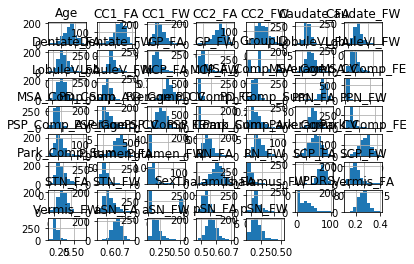

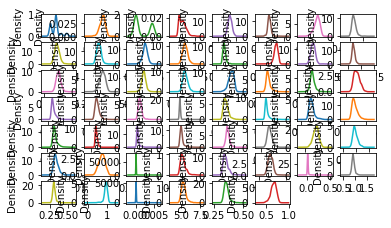

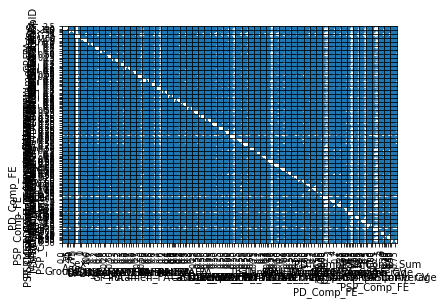

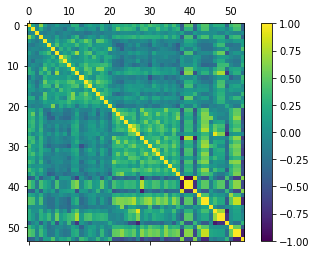

In [4]:
# Data visualizations
 
# histograms
dataset.hist()
pyplot.show()
# density
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False)
pyplot.show()
# box and whisker plots
# dataset.plot(kind='box', subplots=True, layout=(w,8), sharex=False, sharey=False)
# pyplot.show()
 
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()

# Control vs. Parkinsons

In [44]:
from ml_utils import group_classes

dataset = group_classes(DATA_FILE.df, {0:0,1:1, 2:1, 3:1})
vdata = group_classes(VALIDATION_FILE.df, {0:0,1:1, 2:1, 3:1})
vdata_Y = vdata.GroupID
vdata_X = vdata.drop(['GroupID'], axis=1)

print(dataset.GroupID.value_counts())

1    506
0    240
Name: GroupID, dtype: int64


LR: 0.946299 (0.022359)
Holdout:
0.98
[[ 38   1]
 [  2 109]]
             precision    recall  f1-score   support

        0.0       0.95      0.97      0.96        39
        1.0       0.99      0.98      0.99       111

avg / total       0.98      0.98      0.98       150


Validation:
0.933333333333
[[14  1]
 [ 4 56]]
             precision    recall  f1-score   support

          0       0.78      0.93      0.85        15
          1       0.98      0.93      0.96        60

avg / total       0.94      0.93      0.94        75


LDA: 0.912768 (0.043667)
Holdout:
0.96
[[ 39   0]
 [  6 105]]
             precision    recall  f1-score   support

        0.0       0.87      1.00      0.93        39
        1.0       1.00      0.95      0.97       111

avg / total       0.97      0.96      0.96       150


Validation:
0.866666666667
[[15  0]
 [10 50]]
             precision    recall  f1-score   support

          0       0.60      1.00      0.75        15
          1       1.00      0.

C:\Users\jtbricker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


KNN: 0.953107 (0.017784)
Holdout:
0.953333333333
[[ 35   4]
 [  3 108]]
             precision    recall  f1-score   support

        0.0       0.92      0.90      0.91        39
        1.0       0.96      0.97      0.97       111

avg / total       0.95      0.95      0.95       150


Validation:
0.96
[[14  1]
 [ 2 58]]
             precision    recall  f1-score   support

          0       0.88      0.93      0.90        15
          1       0.98      0.97      0.97        60

avg / total       0.96      0.96      0.96        75


CART: 0.921158 (0.018277)
Holdout:
0.966666666667
[[ 38   1]
 [  4 107]]
             precision    recall  f1-score   support

        0.0       0.90      0.97      0.94        39
        1.0       0.99      0.96      0.98       111

avg / total       0.97      0.97      0.97       150


Validation:
0.773333333333
[[13  2]
 [15 45]]
             precision    recall  f1-score   support

          0       0.46      0.87      0.60        15
          1       

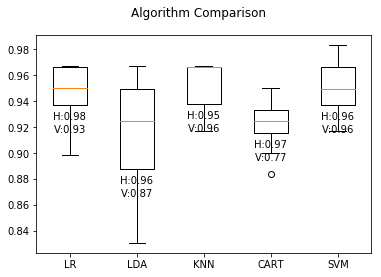

In [70]:
# Prepare Data
 
# Split-out validation dataset
array = dataset.values
X = array[:,1:].astype(float)
Y = array[:,0]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)
 
 
# Evaluate Algorithms
 
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'
 
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
# models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []

accs = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring, n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
    model.fit(X_train, Y_train)

    print("Holdout:")
    predictions = model.predict(X_validation)
    H_acc = accuracy_score(Y_validation, predictions)
    print(H_acc)
    print(confusion_matrix(Y_validation, predictions))
    print(classification_report(Y_validation, predictions))
    print()
    
    print("Validation:")
    predictions = model.predict(vdata_X)
    V_acc = accuracy_score(vdata_Y, predictions)
    print(V_acc)
    print(confusion_matrix(vdata_Y, predictions))
    print(classification_report(vdata_Y, predictions))
    print()
    accs.append((H_acc, V_acc))
    
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
bp_dict = pyplot.boxplot(results)
ax.set_xticklabels(names)

for idx, line in enumerate(bp_dict['boxes']):
    x, y = line.get_xydata()[0] # bottom of left line
    pyplot.text(x+.25,y-0.005, 'H:%.2f' % accs[idx][0],
         horizontalalignment='center', # centered
         verticalalignment='top')
    pyplot.text(x+.25,y-0.015, 'V:%.2f' % accs[idx][1],
         horizontalalignment='center', # centered
         verticalalignment='top')

pyplot.show()

ScaledLR: 0.931215 (0.038737)
Holdout:
0.98
[[ 37   2]
 [  1 110]]
             precision    recall  f1-score   support

        0.0       0.97      0.95      0.96        39
        1.0       0.98      0.99      0.99       111

avg / total       0.98      0.98      0.98       150


Validation:
0.92
[[15  0]
 [ 6 54]]
             precision    recall  f1-score   support

          0       0.71      1.00      0.83        15
          1       1.00      0.90      0.95        60

avg / total       0.94      0.92      0.92        75


ScaledLDA: 0.912768 (0.043667)
Holdout:
0.96
[[ 39   0]
 [  6 105]]
             precision    recall  f1-score   support

        0.0       0.87      1.00      0.93        39
        1.0       1.00      0.95      0.97       111

avg / total       0.97      0.96      0.96       150


Validation:
0.866666666667
[[15  0]
 [10 50]]
             precision    recall  f1-score   support

          0       0.60      1.00      0.75        15
          1       1.00      

C:\Users\jtbricker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\jtbricker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\jtbricker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\jtbricker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\jtbricker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\jtbricker\AppData\Local\Continuum\an

ScaledKNN: 0.745028 (0.030128)
Holdout:
0.753333333333
[[15 24]
 [13 98]]
             precision    recall  f1-score   support

        0.0       0.54      0.38      0.45        39
        1.0       0.80      0.88      0.84       111

avg / total       0.73      0.75      0.74       150


Validation:
0.866666666667
[[12  3]
 [ 7 53]]
             precision    recall  f1-score   support

          0       0.63      0.80      0.71        15
          1       0.95      0.88      0.91        60

avg / total       0.88      0.87      0.87        75


ScaledCART: 0.912712 (0.018165)
Holdout:
0.966666666667
[[ 37   2]
 [  3 108]]
             precision    recall  f1-score   support

        0.0       0.93      0.95      0.94        39
        1.0       0.98      0.97      0.98       111

avg / total       0.97      0.97      0.97       150


Validation:
0.76
[[13  2]
 [16 44]]
             precision    recall  f1-score   support

          0       0.45      0.87      0.59        15
          

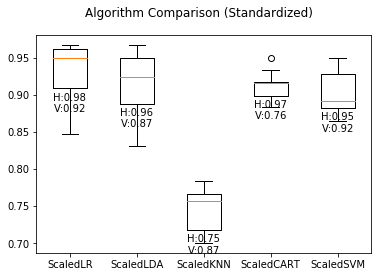

In [72]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
# pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []

accs = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
    model.fit(X_train, Y_train)

    print("Holdout:")
    predictions = model.predict(X_validation)
    H_acc = accuracy_score(Y_validation, predictions)
    print(H_acc)
    print(confusion_matrix(Y_validation, predictions))
    print(classification_report(Y_validation, predictions))
    print()
    
    print("Validation:")
    predictions = model.predict(vdata_X)
    V_acc = accuracy_score(vdata_Y, predictions)
    print(V_acc)
    print(confusion_matrix(vdata_Y, predictions))
    print(classification_report(vdata_Y, predictions))
    print()
    accs.append((H_acc, V_acc))

# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison (Standardized)')
ax = fig.add_subplot(111)
bp_dict = pyplot.boxplot(results)
ax.set_xticklabels(names)

for idx, line in enumerate(bp_dict['boxes']):
    x, y = line.get_xydata()[0] # bottom of left line
    pyplot.text(x+.25,y-0.005, 'H:%.2f' % accs[idx][0],
         horizontalalignment='center', # centered
         verticalalignment='top')
    pyplot.text(x+.25,y-0.02, 'V:%.2f' % accs[idx][1],
         horizontalalignment='center', # centered
         verticalalignment='top')

pyplot.show()

## Idiopathic Park vs Atypical Park 

In [4]:
from ml_utils import group_classes

grouping = {1:0,2:1,3:1}

dataset = group_classes(DATA_FILE.df, grouping)
vdata = group_classes(VALIDATION_FILE.df, grouping)
vdata_Y = vdata.GroupID
vdata_X = vdata.drop(['GroupID'], axis=1)

print(dataset.GroupID.value_counts())

0    399
1    107
Name: GroupID, dtype: int64


LR: 0.876310 (0.065172)
Holdout:
0.852941176471
[[72  2]
 [13 15]]
             precision    recall  f1-score   support

        0.0       0.85      0.97      0.91        74
        1.0       0.88      0.54      0.67        28

avg / total       0.86      0.85      0.84       102


Validation:
0.65
[[37  0]
 [21  2]]
             precision    recall  f1-score   support

          0       0.64      1.00      0.78        37
          1       1.00      0.09      0.16        23

avg / total       0.78      0.65      0.54        60


LDA: 0.900833 (0.065128)
Holdout:
0.843137254902
[[72  2]
 [14 14]]
             precision    recall  f1-score   support

        0.0       0.84      0.97      0.90        74
        1.0       0.88      0.50      0.64        28

avg / total       0.85      0.84      0.83       102


Validation:
0.716666666667
[[37  0]
 [17  6]]
             precision    recall  f1-score   support

          0       0.69      1.00      0.81        37
          1       1.00      

C:\Users\jtbricker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


KNN: 0.752143 (0.108708)
Holdout:
0.735294117647
[[68  6]
 [21  7]]
             precision    recall  f1-score   support

        0.0       0.76      0.92      0.83        74
        1.0       0.54      0.25      0.34        28

avg / total       0.70      0.74      0.70       102


Validation:
0.716666666667
[[34  3]
 [14  9]]
             precision    recall  f1-score   support

          0       0.71      0.92      0.80        37
          1       0.75      0.39      0.51        23

avg / total       0.72      0.72      0.69        60


CART: 0.841667 (0.077352)
Holdout:
0.823529411765
[[67  7]
 [11 17]]
             precision    recall  f1-score   support

        0.0       0.86      0.91      0.88        74
        1.0       0.71      0.61      0.65        28

avg / total       0.82      0.82      0.82       102


Validation:
0.783333333333
[[37  0]
 [13 10]]
             precision    recall  f1-score   support

          0       0.74      1.00      0.85        37
          1     

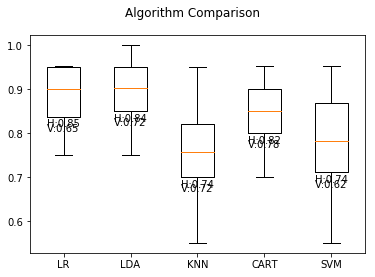

In [5]:
# Prepare Data
 
# Split-out validation dataset
array = dataset.values
X = array[:,1:].astype(float)
Y = array[:,0]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)
 
 
# Evaluate Algorithms
 
# Test options and evaluation metric
num_folds = 20
seed = 7
scoring = 'accuracy'
 
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
# models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []

accs = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring, n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
    model.fit(X_train, Y_train)

    print("Holdout:")
    predictions = model.predict(X_validation)
    H_acc = accuracy_score(Y_validation, predictions)
    print(H_acc)
    print(confusion_matrix(Y_validation, predictions))
    print(classification_report(Y_validation, predictions))
    print()
    
    print("Validation:")
    predictions = model.predict(vdata_X)
    V_acc = accuracy_score(vdata_Y, predictions)
    print(V_acc)
    print(confusion_matrix(vdata_Y, predictions))
    print(classification_report(vdata_Y, predictions))
    print()
    accs.append((H_acc, V_acc))
    
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
bp_dict = pyplot.boxplot(results)
ax.set_xticklabels(names)

for idx, line in enumerate(bp_dict['boxes']):
    x, y = line.get_xydata()[0] # bottom of left line
    pyplot.text(x+.25,y-0.005, 'H:%.2f' % accs[idx][0],
         horizontalalignment='center', # centered
         verticalalignment='top')
    pyplot.text(x+.25,y-0.015, 'V:%.2f' % accs[idx][1],
         horizontalalignment='center', # centered
         verticalalignment='top')

pyplot.show()

ScaledLR: 0.895833 (0.052424)
Holdout:
0.892156862745
[[72  2]
 [ 9 19]]
             precision    recall  f1-score   support

        0.0       0.89      0.97      0.93        74
        1.0       0.90      0.68      0.78        28

avg / total       0.89      0.89      0.89       102


Validation:
0.75
[[37  0]
 [15  8]]
             precision    recall  f1-score   support

          0       0.71      1.00      0.83        37
          1       1.00      0.35      0.52        23

avg / total       0.82      0.75      0.71        60


ScaledLDA: 0.900833 (0.065128)
Holdout:
0.843137254902
[[72  2]
 [14 14]]
             precision    recall  f1-score   support

        0.0       0.84      0.97      0.90        74
        1.0       0.88      0.50      0.64        28

avg / total       0.85      0.84      0.83       102


Validation:
0.716666666667
[[37  0]
 [17  6]]
             precision    recall  f1-score   support

          0       0.69      1.00      0.81        37
          1     

C:\Users\jtbricker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\jtbricker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\jtbricker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\jtbricker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\jtbricker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\jtbricker\AppData\Local\Continuum\an

ScaledCART: 0.854167 (0.084481)
Holdout:
0.823529411765
[[69  5]
 [13 15]]
             precision    recall  f1-score   support

        0.0       0.84      0.93      0.88        74
        1.0       0.75      0.54      0.63        28

avg / total       0.82      0.82      0.81       102


Validation:
0.783333333333
[[37  0]
 [13 10]]
             precision    recall  f1-score   support

          0       0.74      1.00      0.85        37
          1       1.00      0.43      0.61        23

avg / total       0.84      0.78      0.76        60


ScaledSVM: 0.903690 (0.060863)
Holdout:
0.892156862745
[[72  2]
 [ 9 19]]
             precision    recall  f1-score   support

        0.0       0.89      0.97      0.93        74
        1.0       0.90      0.68      0.78        28

avg / total       0.89      0.89      0.89       102


Validation:
0.8
[[37  0]
 [12 11]]
             precision    recall  f1-score   support

          0       0.76      1.00      0.86        37
          1    

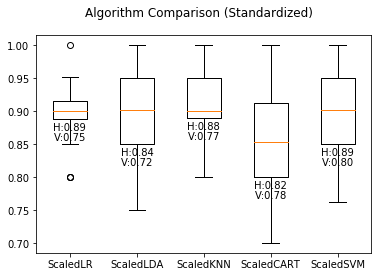

In [6]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
# pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []

accs = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
    model.fit(X_train, Y_train)

    print("Holdout:")
    predictions = model.predict(X_validation)
    H_acc = accuracy_score(Y_validation, predictions)
    print(H_acc)
    print(confusion_matrix(Y_validation, predictions))
    print(classification_report(Y_validation, predictions))
    print()
    
    print("Validation:")
    predictions = model.predict(vdata_X)
    V_acc = accuracy_score(vdata_Y, predictions)
    print(V_acc)
    print(confusion_matrix(vdata_Y, predictions))
    print(classification_report(vdata_Y, predictions))
    print()
    accs.append((H_acc, V_acc))

# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison (Standardized)')
ax = fig.add_subplot(111)
bp_dict = pyplot.boxplot(results)
ax.set_xticklabels(names)

for idx, line in enumerate(bp_dict['boxes']):
    x, y = line.get_xydata()[0] # bottom of left line
    pyplot.text(x+.25,y-0.005, 'H:%.2f' % accs[idx][0],
         horizontalalignment='center', # centered
         verticalalignment='top')
    pyplot.text(x+.25,y-0.02, 'V:%.2f' % accs[idx][1],
         horizontalalignment='center', # centered
         verticalalignment='top')

pyplot.show()

## MSA vs PSP 

In [8]:
from ml_utils import group_classes

grouping = {2:0,3:1}

dataset = group_classes(DATA_FILE.df, grouping)
vdata = group_classes(VALIDATION_FILE.df, grouping)
vdata_Y = vdata.GroupID
vdata_X = vdata.drop(['GroupID'], axis=1)

print(dataset.GroupID.value_counts())

1    55
0    52
Name: GroupID, dtype: int64


LR: 0.750000 (0.185742)
Holdout:
0.909090909091
[[ 7  2]
 [ 0 13]]
             precision    recall  f1-score   support

        0.0       1.00      0.78      0.88         9
        1.0       0.87      1.00      0.93        13

avg / total       0.92      0.91      0.91        22


Validation:
0.913043478261
[[ 7  1]
 [ 1 14]]
             precision    recall  f1-score   support

          0       0.88      0.88      0.88         8
          1       0.93      0.93      0.93        15

avg / total       0.91      0.91      0.91        23


LDA: 0.685000 (0.243465)
Holdout:
0.909090909091
[[ 8  1]
 [ 1 12]]
             precision    recall  f1-score   support

        0.0       0.89      0.89      0.89         9
        1.0       0.92      0.92      0.92        13

avg / total       0.91      0.91      0.91        22


Validation:
0.695652173913
[[ 2  6]
 [ 1 14]]
             precision    recall  f1-score   support

          0       0.67      0.25      0.36         8
          1       

C:\Users\jtbricker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


KNN: 0.575000 (0.225555)
Holdout:
0.590909090909
[[5 4]
 [5 8]]
             precision    recall  f1-score   support

        0.0       0.50      0.56      0.53         9
        1.0       0.67      0.62      0.64        13

avg / total       0.60      0.59      0.59        22


Validation:
0.521739130435
[[5 3]
 [8 7]]
             precision    recall  f1-score   support

          0       0.38      0.62      0.48         8
          1       0.70      0.47      0.56        15

avg / total       0.59      0.52      0.53        23


CART: 0.660000 (0.226716)
Holdout:
0.863636363636
[[ 6  3]
 [ 0 13]]
             precision    recall  f1-score   support

        0.0       1.00      0.67      0.80         9
        1.0       0.81      1.00      0.90        13

avg / total       0.89      0.86      0.86        22


Validation:
0.826086956522
[[ 5  3]
 [ 1 14]]
             precision    recall  f1-score   support

          0       0.83      0.62      0.71         8
          1       0.82  

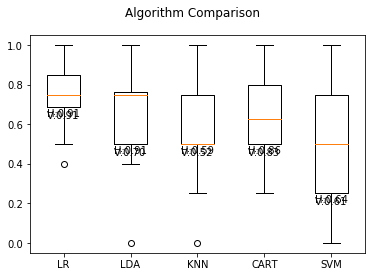

In [9]:
# Prepare Data
 
# Split-out validation dataset
array = dataset.values
X = array[:,1:].astype(float)
Y = array[:,0]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)
 
 
# Evaluate Algorithms
 
# Test options and evaluation metric
num_folds = 20
seed = 7
scoring = 'accuracy'
 
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
# models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []

accs = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring, n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
    model.fit(X_train, Y_train)

    print("Holdout:")
    predictions = model.predict(X_validation)
    H_acc = accuracy_score(Y_validation, predictions)
    print(H_acc)
    print(confusion_matrix(Y_validation, predictions))
    print(classification_report(Y_validation, predictions))
    print()
    
    print("Validation:")
    predictions = model.predict(vdata_X)
    V_acc = accuracy_score(vdata_Y, predictions)
    print(V_acc)
    print(confusion_matrix(vdata_Y, predictions))
    print(classification_report(vdata_Y, predictions))
    print()
    accs.append((H_acc, V_acc))
    
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
bp_dict = pyplot.boxplot(results)
ax.set_xticklabels(names)

for idx, line in enumerate(bp_dict['boxes']):
    x, y = line.get_xydata()[0] # bottom of left line
    pyplot.text(x+.25,y-0.005, 'H:%.2f' % accs[idx][0],
         horizontalalignment='center', # centered
         verticalalignment='top')
    pyplot.text(x+.25,y-0.015, 'V:%.2f' % accs[idx][1],
         horizontalalignment='center', # centered
         verticalalignment='top')

pyplot.show()

ScaledLR: 0.775000 (0.160857)
Holdout:
0.818181818182
[[ 8  1]
 [ 3 10]]
             precision    recall  f1-score   support

        0.0       0.73      0.89      0.80         9
        1.0       0.91      0.77      0.83        13

avg / total       0.83      0.82      0.82        22


Validation:
0.782608695652
[[ 4  4]
 [ 1 14]]
             precision    recall  f1-score   support

          0       0.80      0.50      0.62         8
          1       0.78      0.93      0.85        15

avg / total       0.79      0.78      0.77        23


ScaledLDA: 0.685000 (0.243465)
Holdout:
0.909090909091
[[ 8  1]
 [ 1 12]]
             precision    recall  f1-score   support

        0.0       0.89      0.89      0.89         9
        1.0       0.92      0.92      0.92        13

avg / total       0.91      0.91      0.91        22


Validation:
0.695652173913
[[ 2  6]
 [ 1 14]]
             precision    recall  f1-score   support

          0       0.67      0.25      0.36         8
      

C:\Users\jtbricker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\jtbricker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\jtbricker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\jtbricker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\jtbricker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\jtbricker\AppData\Local\Continuum\an

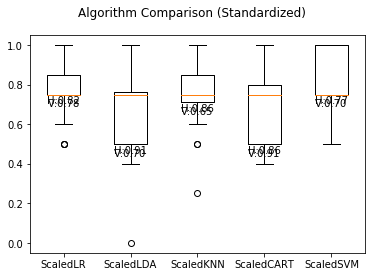

In [10]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
# pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []

accs = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
    model.fit(X_train, Y_train)

    print("Holdout:")
    predictions = model.predict(X_validation)
    H_acc = accuracy_score(Y_validation, predictions)
    print(H_acc)
    print(confusion_matrix(Y_validation, predictions))
    print(classification_report(Y_validation, predictions))
    print()
    
    print("Validation:")
    predictions = model.predict(vdata_X)
    V_acc = accuracy_score(vdata_Y, predictions)
    print(V_acc)
    print(confusion_matrix(vdata_Y, predictions))
    print(classification_report(vdata_Y, predictions))
    print()
    accs.append((H_acc, V_acc))

# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison (Standardized)')
ax = fig.add_subplot(111)
bp_dict = pyplot.boxplot(results)
ax.set_xticklabels(names)

for idx, line in enumerate(bp_dict['boxes']):
    x, y = line.get_xydata()[0] # bottom of left line
    pyplot.text(x+.25,y-0.005, 'H:%.2f' % accs[idx][0],
         horizontalalignment='center', # centered
         verticalalignment='top')
    pyplot.text(x+.25,y-0.02, 'V:%.2f' % accs[idx][1],
         horizontalalignment='center', # centered
         verticalalignment='top')

pyplot.show()